# Devanagari Handwritten Character Recognition

### imports:

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import PIL
import pathlib

### create an array of classes from the train directory classes:

In [3]:
path="data/train"
_classes = os.listdir(path)
num_classes=len(_classes)
print(_classes)
print(num_classes)

['bra', 'dda', 'dma', 'dra', 'dwa', 'dya', 'gri', 'hra', 'hri', 'hya', 'kra', 'mra', 'mri', 'pra', 'rhi', 'shra', 'tra', 'traw', 'tta']
19


### dataset get 

In [5]:
batch_size = 22

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'data/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(28, 28),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'data/validation',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(28, 28),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 3762 files belonging to 19 classes.
Using 3010 files for training.
Found 418 files belonging to 19 classes.
Using 83 files for validation.
['bra', 'dda', 'dma', 'dra', 'dwa', 'dya', 'gri', 'hra', 'hri', 'hya', 'kra', 'mra', 'mri', 'pra', 'rhi', 'shra', 'tra', 'traw', 'tta']


### Autotune

In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(first_image.shape)

(28, 28, 3)


### model setup, compile and training

In [7]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(28, 28, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=50

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0

### Train the model

In [9]:
history=model.fit(train_ds,validation_data=val_ds, epochs=epochs)

Epoch 1/50
137/137 [==============================] - 12s 82ms/step - loss: 2.9478 - accuracy: 0.0492 - val_loss: 2.9453 - val_accuracy: 0.0482
Epoch 2/50
137/137 [==============================] - 10s 76ms/step - loss: 2.9068 - accuracy: 0.0724 - val_loss: 2.6371 - val_accuracy: 0.1325
Epoch 3/50
137/137 [==============================] - 11s 82ms/step - loss: 2.2881 - accuracy: 0.1900 - val_loss: 1.8523 - val_accuracy: 0.3614
Epoch 4/50
137/137 [==============================] - 12s 88ms/step - loss: 1.4623 - accuracy: 0.4326 - val_loss: 0.9799 - val_accuracy: 0.6747
Epoch 5/50
137/137 [==============================] - 11s 83ms/step - loss: 0.9656 - accuracy: 0.6073 - val_loss: 0.8290 - val_accuracy: 0.6506
Epoch 6/50
137/137 [==============================] - 12s 89ms/step - loss: 0.7925 - accuracy: 0.6774 - val_loss: 0.6046 - val_accuracy: 0.7108
Epoch 7/50
137/137 [==============================] - 11s 83ms/step - loss: 0.6865 - accuracy: 0.7276 - val_loss: 0.5483 - val_accuracy:

### Plot the graph

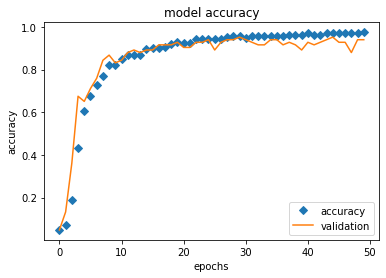

In [10]:
plt.plot(history.history['accuracy'],'D', label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(["accuracy","validation"])
plt.show()

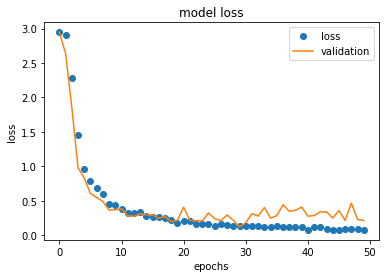

In [11]:
plt.plot(history.history['loss'], 'o', label='loss')
plt.plot(history.history['val_loss'], label='validation')
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(["loss","validation"])
plt.show()

In [12]:
history.history # loss and accuracy dict view

{'loss': [2.947768449783325,
  2.9068443775177,
  2.2880847454071045,
  1.4623034000396729,
  0.9656298756599426,
  0.7924789190292358,
  0.6865247488021851,
  0.596113920211792,
  0.4560583233833313,
  0.44106829166412354,
  0.37511858344078064,
  0.3257425129413605,
  0.3185918629169464,
  0.3352012038230896,
  0.27754929661750793,
  0.26358890533447266,
  0.26048707962036133,
  0.24731329083442688,
  0.22541896998882294,
  0.18080121278762817,
  0.2003767490386963,
  0.20765827596187592,
  0.1627689152956009,
  0.15682031214237213,
  0.15610113739967346,
  0.13990944623947144,
  0.1670113205909729,
  0.14886733889579773,
  0.13294939696788788,
  0.12840963900089264,
  0.13802321255207062,
  0.128236785531044,
  0.13571646809577942,
  0.12561558187007904,
  0.12098545581102371,
  0.13081760704517365,
  0.1179734468460083,
  0.11199931800365448,
  0.12394416332244873,
  0.11625080555677414,
  0.08244168013334274,
  0.12539221346378326,
  0.11510112881660461,
  0.09373147785663605,
  0

### Save the model

In [13]:
model.save('saved_model/ocr4_model')

INFO:tensorflow:Assets written to: saved_model/ocr4_model\assets


### load the model

In [14]:
loaded_model = tf.keras.models.load_model('saved_model/ocr4_model')
# Check its architecture
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0

### Classes and their corresponding character dict

In [15]:
class_dict={"bra": "ब्र", "tta": "त्त", "mra": "म्र", "mri": "मृ", "dwa": "द्व", "hya": "ह्य", "hra": "ह्र", "gri": "गृ", "rhi": "ॠ", 
            "kra": "क्र", "pra": "प्र","dya": "द्य", "dda": "दृ", "hri": "हृ", "traw": "ट्र", "tra": "त्र", "dra": "द्र", "dma": "द्म",
            "shra": "श्र"}

{'bra': 'ब्र', 'tta': 'त्त', 'mra': 'म्र', 'mri': 'मृ', 'dwa': 'द्व', 'hya': 'ह्य', 'hra': 'ह्र', 'gri': 'गृ', 'rhi': 'ॠ', 'kra': 'क्र', 'pra': 'प्र', 'dya': 'द्य', 'dda': 'दृ', 'hri': 'हृ', 'traw': 'ट्र', 'tra': 'त्र', 'dra': 'द्र', 'dma': 'द्म', 'shra': 'श्र'}


### Test image load, reshape, and predict:

(28, 28, 3)
(1, 28, 28, 3)


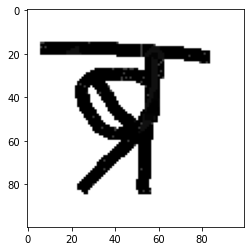

Prediction: ब्र ; confidence: 72.84


In [24]:
imageName='check_image.png'
img_=cv2.imread(imageName)
img_=cv2.resize(img_, (28,28)) # resize to 180,180 as that is on which model is trained on
_img_ = tf.expand_dims(img_, 0) # expand the dims means change shape from (180, 180, 3) to (1, 180, 180, 3)
im = cv2.imread(imageName,1)
im=cv2.resize(im, (100,100))
plt.imshow(im,cmap=plt.cm.binary)
print(img_.shape)
print(_img_.shape)
plt.show()

predictions = loaded_model.predict(_img_)
score = tf.nn.softmax(predictions[0]) # # get softmax for each output
_class_=class_names[np.argmax(score)]

selected_devnagari_label=class_dict[_class_]
print(
    "Prediction: {} ; confidence: {:.2f}"
    .format(selected_devnagari_label, 100 * np.max(score))
) 